# Data!

This notebook focuses on actual data that we input to a neural network. We focus on:
- Accquiring the data
- Preprocessing data
- How to iterate over the data

In [3]:
import torch
import torchvision
from torchvision import transforms, datasets

Torchvision is a collection of data/datasets that we can use to train our model on. It has a bunch of vision data. 
Next we need to define our training and testing dataset.

## MNIST Data
Next we use MNIST dataset. The data is not in the form of a tensor, so we need to transform it into a tensor.

In [8]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()])) 

In [9]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

# Generalizing Data
## Batch Size
The reason why we batch data is because our data is going to be so big that we might not be able to fit it on a GPU. The second reason is that if you pass the entire data through the model at once, the machine might learn the stuff specific to the data in addition to the 'general' stuff. What we do is that we pass the data in batches so it only optimizes for the 'general' stuff.

Batch size is also a trial and error thing. There is a sweet spot wich is usually between 8 and 64, regardless of how big the memory is.

You want your batch size to be as big as possible because that impacts how quickly you're going to train through your data.

## Shuffle
We need to shuffle a non sequential data because, taking an example, if we feed in all the 0s at once, machine would think that everything is 0, then we'll feed 1, and the machine will think everything is 1.. and so on.

#### Both the steps are carried out here to generalize as much as possible

Next, lets see how the data is:

In [10]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

The above print is representing a batch, we have 10 examples of hand written digits and the corresponding pixels or tensors.

Next, we can show the image using Matplotlib. But for that we need to reshape the tensor to a $28\times 28$ matrix.

In [13]:
data[0][0].shape

torch.Size([1, 28, 28])

The 1 needs to be dealt with

In [11]:
x, y = data[0][0], data[1][0]
# data is a list of tensors, where x will be the first batch matrix and y will be the actual answer/number

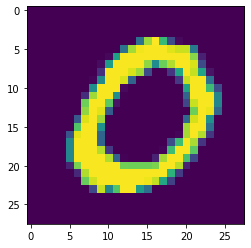

In [12]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

As seen in the print(data), the first example is that of a 0, we reshaped the tensor and used matplotlib to visualize the pixel image

# Balancing the data
It is important to balance the training dataset, it means that there should be adequate examples of all the instances. If there is just 60% 3 in our dataset, the machine will learn to always predict a 3 to minimize the loss and get stuck there.

In [14]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


Now, finding the % of all the data instances, 

In [15]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]*100/total}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915
